In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
Jobs_major_df  = pd.read_csv('../../data_files/Jobs_All_Major_Group_Area_Title_df.csv')
Jobs_major_df.head(5)

,Unnamed: 0,o_group,area_title,occ_title,tot_emp,sum_area_occupations,jobs_1000,istech,area_name,population,...,educational_attainment_no_diploma,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other
0,0,major,"Abilene, TX",Management Occupations,2910,66070,22,1,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
1,1,major,"Abilene, TX",Business and Financial Operations Occupations,2150,66070,16,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
2,2,major,"Abilene, TX",Computer and Mathematical Occupations,820,66070,6,1,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
3,3,major,"Abilene, TX",Architecture and Engineering Occupations,840,66070,6,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
4,4,major,"Abilene, TX","Life, Physical, and Social Science Occupations",370,66070,3,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200


# Copy of the dataframe to feed ML 



In [3]:
Jobs_tech_df_copy = Jobs_major_df.copy()
Jobs_tech_df_copy.head(5)

,Unnamed: 0,o_group,area_title,occ_title,tot_emp,sum_area_occupations,jobs_1000,istech,area_name,population,...,educational_attainment_no_diploma,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other
0,0,major,"Abilene, TX",Management Occupations,2910,66070,22,1,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
1,1,major,"Abilene, TX",Business and Financial Operations Occupations,2150,66070,16,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
2,2,major,"Abilene, TX",Computer and Mathematical Occupations,820,66070,6,1,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
3,3,major,"Abilene, TX",Architecture and Engineering Occupations,840,66070,6,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200
4,4,major,"Abilene, TX","Life, Physical, and Social Science Occupations",370,66070,3,0,"Abilene, TX",133731,...,19258,43669,2626,81145,12275,34147,689,73,2576,200


In [4]:
Jobs_tech_df_copy.columns.to_list()

['Unnamed: 0',
 'o_group',
 'area_title',
 'occ_title',
 'tot_emp',
 'sum_area_occupations',
 'jobs_1000',
 'istech',
 'area_name',
 'population',
 'median_age',
 'average_income',
 'family_poverty',
 'educational_attainment_bachelors',
 'educational_attainment_graduate',
 'educational_attainment_high_school',
 'educational_attainment_no_diploma',
 'educational_attainment_some_college',
 'race_asian',
 'race_white',
 'race_black',
 'race_hispanic',
 'race_native',
 'race_islander',
 'race_two',
 'race_other']

In [5]:
Jobs_tech_df_copy.drop(['Unnamed: 0','educational_attainment_high_school','educational_attainment_no_diploma'],axis= 1)

,o_group,area_title,occ_title,tot_emp,sum_area_occupations,jobs_1000,istech,area_name,population,median_age,...,educational_attainment_graduate,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other
0,major,"Abilene, TX",Management Occupations,2910,66070,22,1,"Abilene, TX",133731,29,...,9695,43669,2626,81145,12275,34147,689,73,2576,200
1,major,"Abilene, TX",Business and Financial Operations Occupations,2150,66070,16,0,"Abilene, TX",133731,29,...,9695,43669,2626,81145,12275,34147,689,73,2576,200
2,major,"Abilene, TX",Computer and Mathematical Occupations,820,66070,6,1,"Abilene, TX",133731,29,...,9695,43669,2626,81145,12275,34147,689,73,2576,200
3,major,"Abilene, TX",Architecture and Engineering Occupations,840,66070,6,0,"Abilene, TX",133731,29,...,9695,43669,2626,81145,12275,34147,689,73,2576,200
4,major,"Abilene, TX","Life, Physical, and Social Science Occupations",370,66070,3,0,"Abilene, TX",133731,29,...,9695,43669,2626,81145,12275,34147,689,73,2576,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,major,"Waterbury, CT",Office and Administrative Support Occupations,8310,59170,53,0,"Waterbury, CT",157666,38,...,12514,43725,4045,80795,22078,45056,34,41,4708,909
4730,major,"Waterbury, CT",Construction and Extraction Occupations,2370,59170,15,0,"Waterbury, CT",157666,38,...,12514,43725,4045,80795,22078,45056,34,41,4708,909
4731,major,"Waterbury, CT","Installation, Maintenance, and Repair Occupations",2370,59170,15,0,"Waterbury, CT",157666,38,...,12514,43725,4045,80795,22078,45056,34,41,4708,909
4732,major,"Waterbury, CT",Production Occupations,5100,59170,32,0,"Waterbury, CT",157666,38,...,12514,43725,4045,80795,22078,45056,34,41,4708,909


In [6]:
Jobs_tech_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Unnamed: 0                           4734 non-null   int64 
 1   o_group                              4734 non-null   object
 2   area_title                           4734 non-null   object
 3   occ_title                            4734 non-null   object
 4   tot_emp                              4734 non-null   int64 
 5   sum_area_occupations                 4734 non-null   int64 
 6   jobs_1000                            4734 non-null   int64 
 7   istech                               4734 non-null   int64 
 8   area_name                            4734 non-null   object
 9   population                           4734 non-null   int64 
 10  median_age                           4734 non-null   int64 
 11  average_income                       4734 n

In [7]:
#sum 'race_two','race_native','race_islander','race_other' and made a new column race_others to improve machine model performance 
Jobs_tech_df_copy['race_others']= Jobs_tech_df_copy[['race_native','race_islander','race_two','race_other']].sum(axis=1)
Jobs_tech_df_copy.head(5)

,Unnamed: 0,o_group,area_title,occ_title,tot_emp,sum_area_occupations,jobs_1000,istech,area_name,population,...,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_native,race_islander,race_two,race_other,race_others
0,0,major,"Abilene, TX",Management Occupations,2910,66070,22,1,"Abilene, TX",133731,...,43669,2626,81145,12275,34147,689,73,2576,200,3538
1,1,major,"Abilene, TX",Business and Financial Operations Occupations,2150,66070,16,0,"Abilene, TX",133731,...,43669,2626,81145,12275,34147,689,73,2576,200,3538
2,2,major,"Abilene, TX",Computer and Mathematical Occupations,820,66070,6,1,"Abilene, TX",133731,...,43669,2626,81145,12275,34147,689,73,2576,200,3538
3,3,major,"Abilene, TX",Architecture and Engineering Occupations,840,66070,6,0,"Abilene, TX",133731,...,43669,2626,81145,12275,34147,689,73,2576,200,3538
4,4,major,"Abilene, TX","Life, Physical, and Social Science Occupations",370,66070,3,0,"Abilene, TX",133731,...,43669,2626,81145,12275,34147,689,73,2576,200,3538


# NOTE: We have to drop the tot_emp, population, and sum_area_occupations. Those should not be known values since they equate to JOBS_1000

## Since these columns are dropped, our accuracy score goes down way low because now it's relying solely on the demographic columns. 

## The model won't find a good pattern since each row is only a slice of an area, but that slice is being treated as a unique location. Although it's data represents a slice.

### There's 20~ rows for Abilene which represents an area, but the ML doesn't know they are related in any way since we are not aggregated them by "area_title". So ML sees each Abilene row as a standalone.

Abilene altogether may have 200+ jobs_1000 per 66k (race_white + race_asian + race_black + etc...)
But ML sees 
- Abiliene A ['jobs_1000'] = 22 per 1000 out of 66k
- Abiliene B ['jobs_1000'] = 16 per 1000 out of 66k

When it needs to see
- Abiliene['jobs_1000'] = 475 per 1000 out of 66k


In [8]:
# reducing columns to improve model performance 
Jobs_tech_df_copy = Jobs_tech_df_copy.drop(['Unnamed: 0','o_group','area_title','occ_title','area_name',
                       'educational_attainment_high_school',
                       'educational_attainment_no_diploma',
                       'race_two','race_native','race_islander','race_other', 'sum_area_occupations', 'istech', 'tot_emp', 'population'],axis=1)

In [9]:
Jobs_tech_df_copy.isnull().values.any()

False

In [10]:
Jobs_tech_df_copy.shape

(4734, 12)

In [11]:
Jobs_tech_df_copy.columns.to_list()

['jobs_1000',
 'median_age',
 'average_income',
 'family_poverty',
 'educational_attainment_bachelors',
 'educational_attainment_graduate',
 'educational_attainment_some_college',
 'race_asian',
 'race_white',
 'race_black',
 'race_hispanic',
 'race_others']

In [12]:
Jobs_tech_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   jobs_1000                            4734 non-null   int64
 1   median_age                           4734 non-null   int64
 2   average_income                       4734 non-null   int64
 3   family_poverty                       4734 non-null   int64
 4   educational_attainment_bachelors     4734 non-null   int64
 5   educational_attainment_graduate      4734 non-null   int64
 6   educational_attainment_some_college  4734 non-null   int64
 7   race_asian                           4734 non-null   int64
 8   race_white                           4734 non-null   int64
 9   race_black                           4734 non-null   int64
 10  race_hispanic                        4734 non-null   int64
 11  race_others                          4734 non-null   int

In [13]:
X = Jobs_tech_df_copy.drop('jobs_1000',axis=1)#features
y = Jobs_tech_df_copy['jobs_1000'] #Target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)


In [15]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
y_predict = regressor.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5927195865625206

In [18]:
regressor.score(X_train,y_train)

0.5806020046424104

In [19]:
regressor.score(X_test,y_test)

0.5927195865625206

In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
mae

38.63821999693934

# Note: This is a reason why I think our data is off, max value is too high for category jobs_1000

In [24]:
max_jobs_1000 = Jobs_tech_df_copy['jobs_1000'].max()
min_jobs_1000 = Jobs_tech_df_copy['jobs_1000'].min()
print ('min = ', min_jobs_1000)
print('max = ', max_jobs_1000)

min =  0
max =  7941


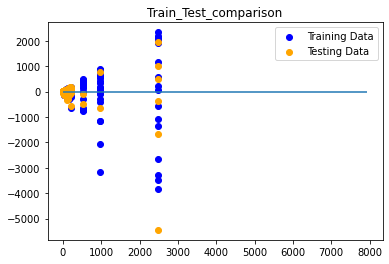

In [21]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [22]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(regressor.predict(X_test[:10]))}')

Actual:		[3, 15, 61, 16, 113, 51, 200, 31, 84, 29]
Predicted:	[17.415700965700964, 8.432381850175968, 33.108129807517685, 18.347998366013073, 102.98167846601282, 16.574610459165378, 215.47314608636975, 56.70100155385961, 27.773098432355397, 73.82590001587678]


# START MODEL TESTING

- A random row was selected to use as baseline values for comparison
- Ran the prediction 5 times
 - each time changing the population of a race by N
- Prints out the change in jobs_1000

# TEST A : Start with a random Baseline as reference

In [23]:
(X_test[:1])

,median_age,average_income,family_poverty,educational_attainment_bachelors,educational_attainment_graduate,educational_attainment_some_college,race_asian,race_white,race_black,race_hispanic,race_others
4716,38,59582,25653,18394,12514,43725,4045,80795,22078,45056,5692


In [25]:
# intetionally left blank